<a href="https://colab.research.google.com/github/ArsheenSingh/Personal-Python-Projects/blob/main/Handwritten_Number_Recognition_Using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [ ]:
model = tf.keras.models.Sequential(
    [


        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(units=128, activation='relu'),  #using rectifying linear unit (relu) as activation function
        tf.keras.layers.Dense(units=128, activation='relu'),
        tf.keras.layers.Dense(units=10, activation='softmax'),




    ], name = "my_model"
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8684 - loss: 0.4654
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9664 - loss: 0.1129
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9781 - loss: 0.0703


In [ ]:
#Evaluating the Model now:
loss , accuracy = model.evaluate(x_test,y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1133
Loss: 0.10173343867063522
Accuracy: 0.9699000120162964


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


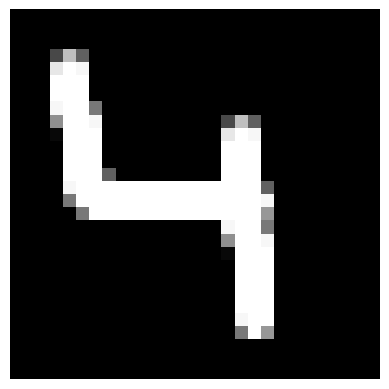

Prediction: 4


In [ ]:
image = cv2.imread('/content/drive/MyDrive/Hand Written Digit Recognition Project/Handwritten Digits/NewRandom-5.png')


image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


image = cv2.resize(image, (28, 28))

image = np.invert(image)


image = image.astype('float32') / 255.0


image = image.reshape(1, 28, 28, 1)


prediction = model.predict(image)

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.axis('off')
plt.show()


print(f"Prediction: {np.argmax(prediction[0])}")
